In [2]:
# Dpendences needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import time
from tensorflow.keras.callbacks import TensorBoard
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model


In [3]:
# hide GPU from visible devices
tf.config.set_visible_devices([], 'GPU')

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
IMG_ROWS = 28           # image hieght
IMG_COLS = 28           # image width
NUM_CLASSES = 10        # labels numbers
TEST_SIZE = 0.2         # validation split

# Model
dense_layers = [1]
layer_sizes = [64]
Conv2D_layers = [1] #should be 3 or more >>>
NO_EPOCHS = 10
BATCH_SIZE = 4

# Dataset PATH
PATH = r"FASHION-MNIST"


In [6]:
# Load the dataset
train_file = PATH+r"\fashion-mnist_train.csv"
test_file  = PATH+r"\fashion-mnist_test.csv"

train_im = pd.read_csv(train_file)
test_im = pd.read_csv(test_file)

In [7]:
# Data exploration

print("Fashion MNIST train -  rows:",train_im.shape[0]," columns:", train_im.shape[1])
print("Fashion MNIST test -  rows:",test_im.shape[0]," columns:", test_im.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [8]:
#  Create a dictionary for each type of label 


labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [9]:
# Class distribution : how many images in every label ?


def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

In [10]:
# Trainig data details


get_classes_distribution(train_im)

T-shirt/top         :   6000 or 10.0%
Trouser             :   6000 or 10.0%
Pullover            :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Shirt               :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%


In [11]:
# Testing data details


get_classes_distribution(test_im)

T-shirt/top         :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sneaker             :   1000 or 10.0%


In [12]:
#train_im.head()
#test_im.head()

Total number of sample images to plot:  40


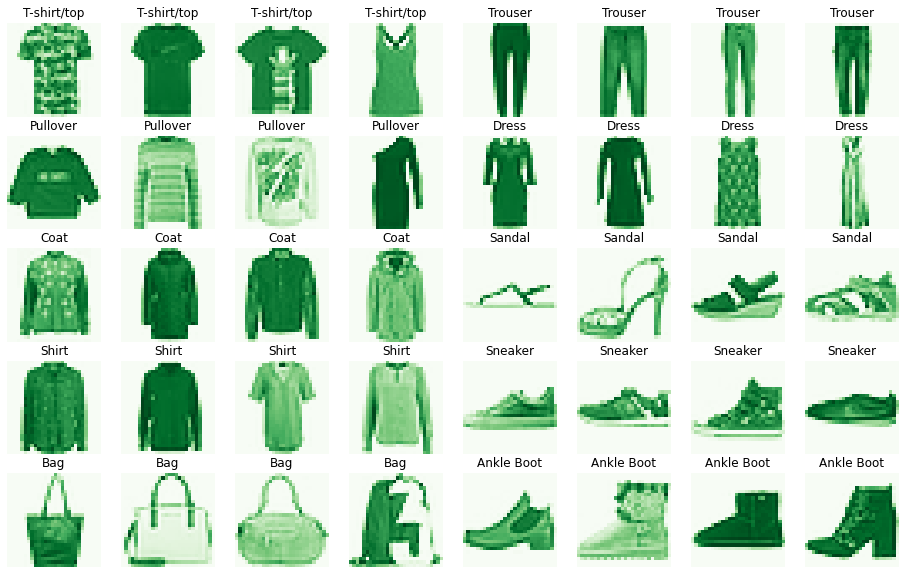

In [13]:
# Showing sample images from dataset

# get sample images with thier lables
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

# plotting the sample images
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()

# For train images
train_sample_images, train_sample_labels = sample_images_data(train_im)   # get sample images
plot_sample_images(train_sample_images,train_sample_labels, "Greens")       # plot the images

In [14]:
# Data preprocessing
# We reshape the columns from (785) to (28,28,1). We also save label (target) feature as a separate vector.

train_data = np.array(train_im , dtype = 'float32')
test_data = np.array(test_im , dtype = 'float32')

trainX = train_data[:,1:].reshape(-1,28,28,1) / 255

#trainX = tf.keras.utils.normalize(trainX , axis = 1)
trainY = train_data[:,0] 

testX = test_data[:,1:].reshape(-1,28,28,1) / 255

#oR
#testX = tf.keras.utils.normalize(testX , axis = 1)
testY = test_data[:,0]


In [15]:
# Split train data into train and validation set

trainX , validX , trainY , validY = train_test_split(trainX , trainY , test_size = TEST_SIZE)

In [16]:
print("Fashion MNIST train -  rows:",trainX.shape[0]," columns:", trainX.shape[1:4])
print("Fashion MNIST valid -  rows:",validX.shape[0]," columns:", validX.shape[1:4])
print("Fashion MNIST test -  rows:",testX.shape[0]," columns:", testX.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


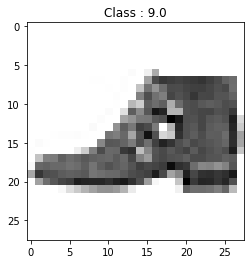

In [17]:
plt.imshow(trainX[10], cmap=plt.cm.binary)#trainX have a index from 1 to 48000
plt.title('Class : {}'.format(trainY[10]))
plt.show()
# print(trainX[0])

In [18]:
# Prepare the data for the training

im_shape = (IMG_ROWS , IMG_COLS  ,1)
trainX = trainX.reshape(trainX.shape[0],*im_shape)
testX = testX.reshape(testX.shape[0],*im_shape)
validX = validX.reshape(validX.shape[0],*im_shape)

In [19]:
print(trainX.shape)
print(testX.shape)
print(validX.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [20]:
# Building the model


for dense_layer in dense_layers :
    for layer_size in layer_sizes :
        for Conv2D_layer in Conv2D_layers :
            Name = "{}-conc-{}-nodes-{}-dense-{}".format(Conv2D_layer,layer_size,dense_layer,int(time.time()))
            tensorboard = TensorBoard(log_dir=r'logs\{}'.format('cnn_layer'),
                                      write_graph = True,
                                      write_grads = True,
                                      histogram_freq = 1,
                                      write_images = True   )
            print(Name)
            cnn_model = Sequential()
            cnn_model.add(Conv2D(filters = 32 , kernel_size = 3 ,
                                            activation = 'relu' ,
                                           input_shape=im_shape ,
                                           kernel_initializer='he_normal'))
            cnn_model.add(MaxPooling2D(pool_size=2))
            # Add dropouts to the model
            cnn_model.add(Dropout(0.25))
            cnn_model.add(Conv2D(filters = 64 , kernel_size = 3 , activation = 'relu'))
            cnn_model.add(MaxPooling2D(pool_size=2))
            # Add dropouts to the model
            cnn_model.add(Dropout(0.25))
            
            
            for l in range (Conv2D_layer-2):
                cnn_model.add(Conv2D(filters = layer_size , kernel_size = 3 , activation = 'relu'))
                cnn_model.add(MaxPooling2D(pool_size=2))
                # Add dropouts to the model
                cnn_model.add(Dropout(0.4))
            
            
            
            cnn_model.add(Flatten()) 
            for l in range (dense_layer):
                cnn_model.add(Dense(layer_size,activation = 'relu'))
            
            # Add dropouts to the model   
            cnn_model.add(Dropout(0.3))  
            cnn_model.add(Dense(len(labels),activation = 'softmax'))    
            cnn_model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"]) 
            
            
            train_model=cnn_model.fit(trainX,trainY,batch_size = BATCH_SIZE
                                      ,epochs = NO_EPOCHS ,verbose = 1,
                                      validation_data = (validX,validY),callbacks=[tensorboard])



1-conc-64-nodes-1-dense-1640856076
Epoch 1/10
12000/12000 [==============================] - 41s 3ms/step - loss: 0.5644 - accuracy: 0.7932 - val_loss: 0.3667 - val_accuracy: 0.8648
Epoch 2/10
12000/12000 [==============================] - 32s 3ms/step - loss: 0.4054 - accuracy: 0.8543 - val_loss: 0.3227 - val_accuracy: 0.8835
Epoch 3/10
12000/12000 [==============================] - 30s 3ms/step - loss: 0.3755 - accuracy: 0.8637 - val_loss: 0.2933 - val_accuracy: 0.8922
Epoch 4/10
12000/12000 [==============================] - 29s 2ms/step - loss: 0.3574 - accuracy: 0.8688 - val_loss: 0.2992 - val_accuracy: 0.8866
Epoch 5/10
12000/12000 [==============================] - 32s 3ms/step - loss: 0.3459 - accuracy: 0.8731 - val_loss: 0.2978 - val_accuracy: 0.8947
Epoch 6/10
12000/12000 [==============================] - 39s 3ms/step - loss: 0.3429 - accuracy: 0.8761 - val_loss: 0.2906 - val_accuracy: 0.8937
Epoch 7/10
12000/12000 [==============================] - 35s 3ms/step - loss: 0.33

In [262]:
cnn_model.save('Hallo world in deutsch language')

INFO:tensorflow:Assets written to: Hallo world in deutsch language\assets


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)             

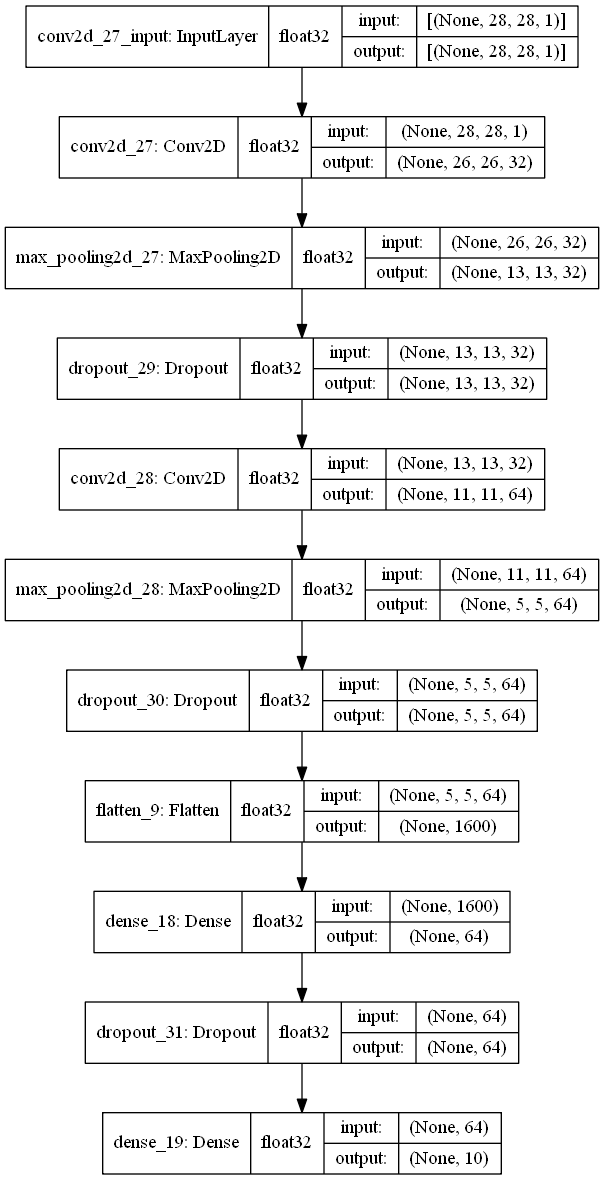

In [264]:
#Details about model training

cnn_model.summary()
plot_model(cnn_model, to_file='.keras\datasets/model_plot.png', show_shapes=True, show_layer_names=True , show_dtype=True)

In [21]:
score = cnn_model.evaluate(testX,testY,verbose=0)
print("test loss :" , score[0])
print("test acc :" , score[1])

test loss : 0.2970564067363739
test acc : 0.8934999704360962


In [22]:
# predict the first 10 images , probability Distribution
P = cnn_model.predict(testX[:30])
#print(P)

In [23]:
prediction = np.argmax(P , axis=1)
print(prediction)
print(testY[:30])

[0 1 2 6 3 6 8 6 5 0]
[0. 1. 2. 2. 3. 2. 8. 6. 5. 0.]


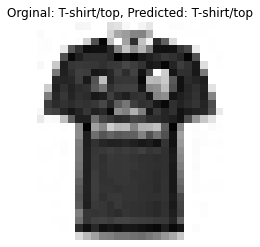

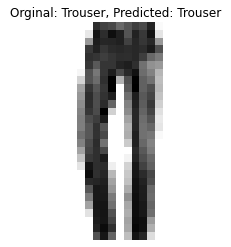

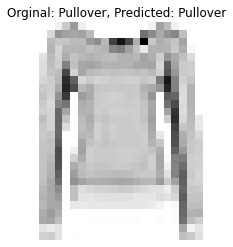

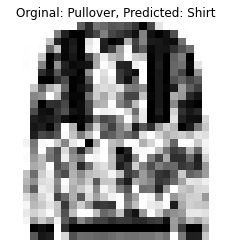

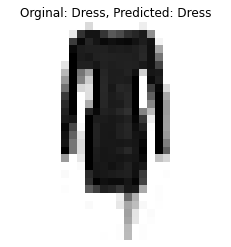

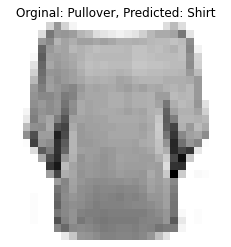

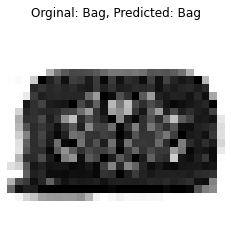

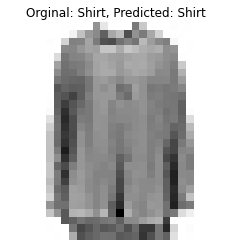

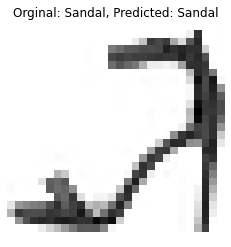

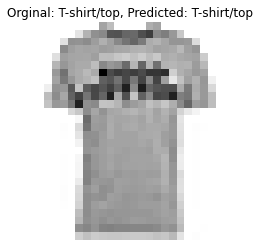

<Figure size 432x288 with 0 Axes>

In [24]:
for i in range(30):
    plt.imshow(testX[i],cmap='binary')
    plt.title('Orginal: {}, Predicted: {}'.format(labels[testY[i]],labels[prediction[i]]))
    plt.axis("Off")
    plt.figure()
    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    accuracy = hist['accuracy']
    val_accuracy = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(accuracy)+1))
    
    trace_ta = create_trace(epochs,accuracy,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_accuracy,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename='accuracy-loss')

plot_accuracy_and_loss(train_model)